# KNN알고리즘을 이용한 농구선수 포지션 예측

In [12]:
import platform
import os
# 한글 폰트 설치 
path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)

# 마이너스 부호 표시 
plt.rcParams['axes.unicode_minus'] = False

In [11]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns    
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

## 데이터 로드 

In [4]:
basketball = pd.read_csv("C:/dataAnalysis/philosophy_datascience/DataScience/data/basketball.csv")

In [5]:
basketball.columns = ["선수명", "포지션", "3점슛성공", "2점슛성공", "리바운드", "어시스트", "가로채기", "블라킹"]

In [6]:
basketball.columns

Index(['선수명', '포지션', '3점슛성공', '2점슛성공', '리바운드', '어시스트', '가로채기', '블라킹'], dtype='object')

In [7]:
df = basketball.set_index("선수명")
df

,포지션,3점슛성공,2점슛성공,리바운드,어시스트,가로채기,블라킹
선수명,,,,,,,
Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5
...,...,...,...,...,...,...,...
Nikola Vucevic,C,0.3,6.1,10.4,2.8,1.0,1.0
Dwyane Wade,SG,0.8,6.2,4.5,3.8,1.4,0.7
Dion Waiters,SG,1.8,4.3,3.3,4.3,0.9,0.4


## 데이터를 파악하기 위한 시각화

In [8]:
df.corr()

,3점슛성공,2점슛성공,리바운드,어시스트,가로채기,블라킹
3점슛성공,1.000000,-0.094914,-0.498036,0.485010,0.353517,-0.534588
2점슛성공,-0.094914,1.000000,0.680882,0.396094,0.353558,0.482056
리바운드,-0.498036,0.680882,1.000000,0.026689,0.130441,0.707542
어시스트,0.485010,0.396094,0.026689,1.000000,0.640802,-0.148161
가로채기,0.353517,0.353558,0.130441,0.640802,1.000000,-0.138208
블라킹,-0.534588,0.482056,0.707542,-0.148161,-0.138208,1.000000


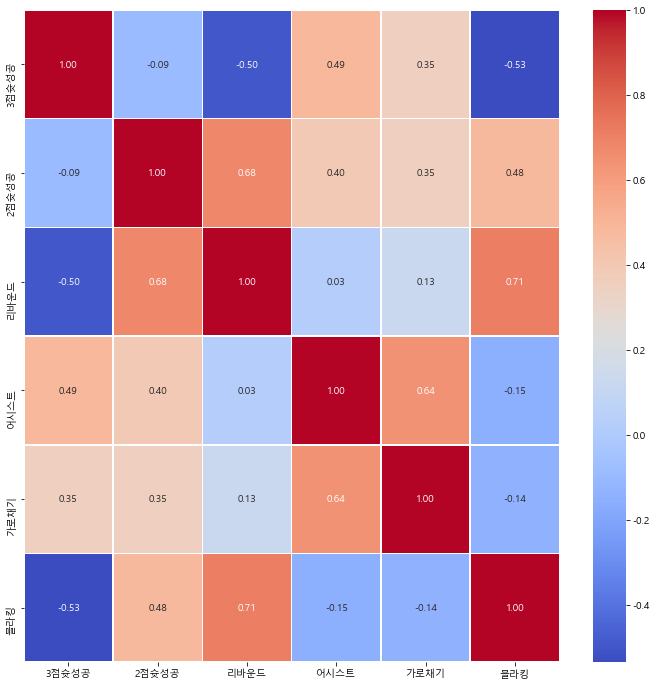

In [13]:
plt.figure(figsize=(12,12))
sns.heatmap(data = df.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='coolwarm')

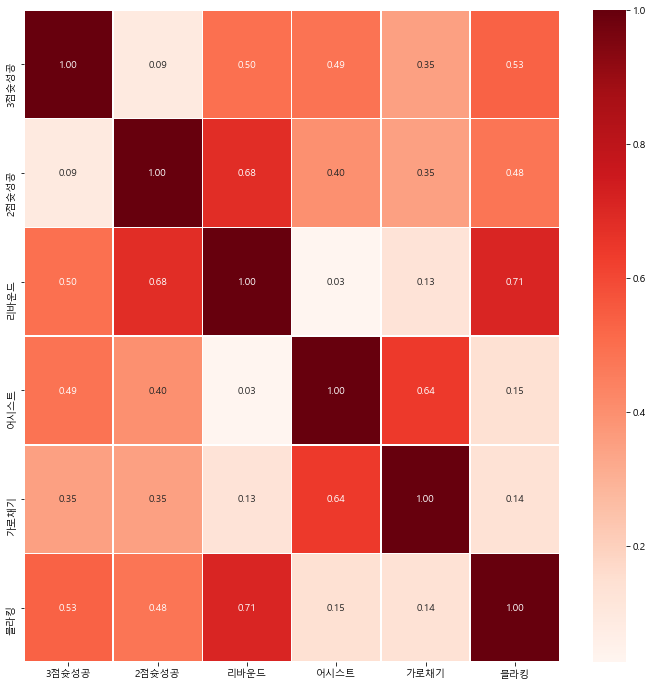

In [14]:
plt.figure(figsize=(12,12))
sns.heatmap(data = abs(df.corr()), annot=True, fmt = '.2f', linewidths=.5, cmap='Reds')

In [121]:
df.포지션.value_counts()

SG    50
C     50
Name: 포지션, dtype: int64

In [123]:
df.reset_index()

,선수명,포지션,3점슛성공,2점슛성공,리바운드,어시스트,가로채기,블라킹
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5
...,...,...,...,...,...,...,...,...
95,Nikola Vucevic,C,0.3,6.1,10.4,2.8,1.0,1.0
96,Dwyane Wade,SG,0.8,6.2,4.5,3.8,1.4,0.7
97,Dion Waiters,SG,1.8,4.3,3.3,4.3,0.9,0.4
98,Hassan Whiteside,C,0.0,7.0,14.1,0.7,0.7,2.1


Text(0.5, 1.0, '포지션별 가로채기 대비 2점슛 성공')

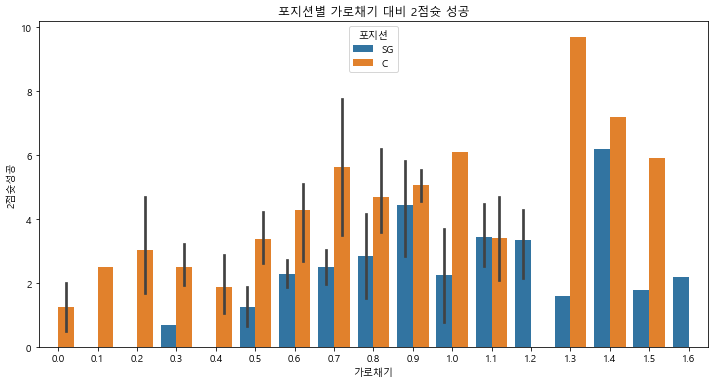

In [15]:
fig = plt.figure(figsize = (12,6))
sns.barplot(x = '가로채기', y = '2점슛성공', data=df, hue = '포지션')
plt.title("포지션별 가로채기 대비 2점슛 성공")

Text(0.5, 1.0, '포지션별 어시스트 대비 2점슛 성공')

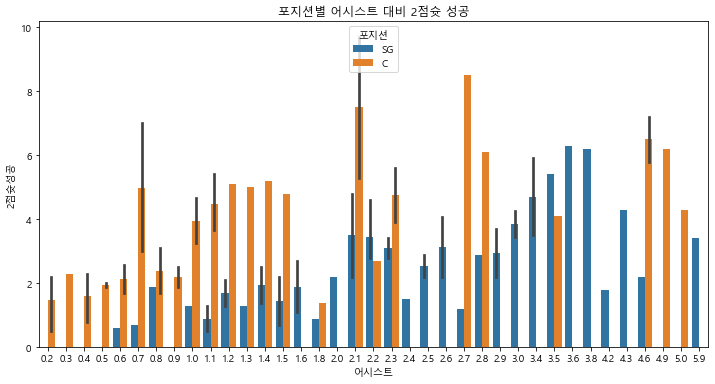

In [16]:
fig = plt.figure(figsize = (12,6))
sns.barplot(x = '어시스트', y = '2점슛성공', data=df, hue = '포지션')
plt.title("포지션별 어시스트 대비 2점슛 성공")

* 포지션을 예측하는데, `어시스트`, `가로채기`, `2점슛성공`이라는 파생변수는 큰 영향을 주지 못함.
* 왜냐하면, 포지션별로 보더라도 ,슈팅가드와 센터와 상관없이 2점슛 성공횟수는 다양하게 분포됨어 있다.

Text(0.5, 1.0, '포지션별 가로채기 대비 3점슛 성공')

<Figure size 864x864 with 0 Axes>

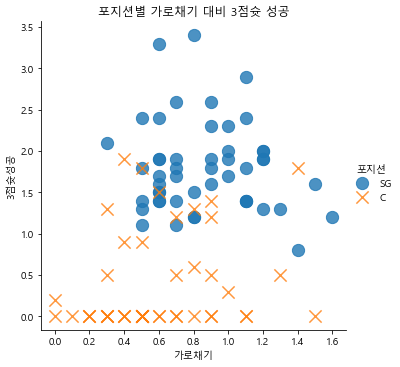

In [17]:
fig = plt.figure(figsize = (12,12))
sns.lmplot(x = '가로채기', y = '3점슛성공', data=df, hue = '포지션',scatter_kws = {"s": 150}, markers = ["o", "x"],fit_reg = False)
plt.title("포지션별 가로채기 대비 3점슛 성공")

Text(0.5, 1.0, '포지션별 가로채기 대비 3점슛 성공')

<Figure size 864x864 with 0 Axes>

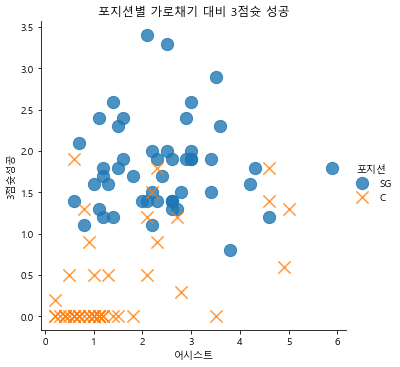

In [18]:
fig = plt.figure(figsize = (12,12))
sns.lmplot(x = '어시스트', y = '3점슛성공', data=df, hue = '포지션',scatter_kws = {"s": 150}, markers = ["o", "x"],fit_reg = False)
plt.title("포지션별 가로채기 대비 3점슛 성공")

Text(0.5, 1.0, '포지션별 가로채기 대비 2점슛 성공')

<Figure size 864x864 with 0 Axes>

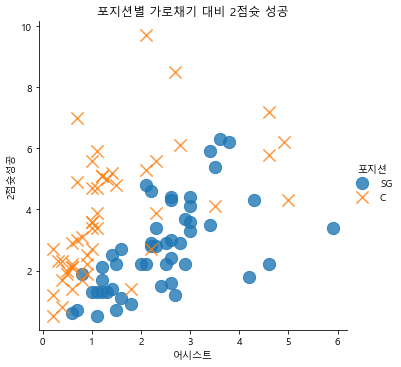

In [20]:
fig = plt.figure(figsize = (12,12))
sns.lmplot(x = '어시스트', y = '2점슛성공', data=df, hue = '포지션',scatter_kws = {"s": 150}, markers = ["o", "x"],fit_reg = False)
plt.title("포지션별 가로채기 대비 2점슛 성공")

* `2점슛성공`혹은 `가로채기`, '어시스트`는 `포지션`을  결정하는데 영항을 주지 못함.
* 결론은 해당 컬럼은 분별력이 없는 데이터를 가진 컬럼으로 삭제하고 진행하기로 결정함.
* **`포지션`결정에 영향을 주는 변수**는 **`3점슛성공`**, **`리바운드'**, **`블라킹`** 이다.

## 분별력이 없는 컬럼 삭제

In [21]:
df.drop(columns = ["2점슛성공", "가로채기", "어시스트"], axis = 1, inplace = True)

In [22]:
df.head()

,포지션,3점슛성공,리바운드,블라킹
선수명,,,,
Alex Abrines,SG,1.4,1.3,0.1
Steven Adams,C,0.0,7.7,1.0
Alexis Ajinca,C,0.0,4.5,0.6
Chris Andersen,C,0.0,2.6,0.6
Will Barton,SG,1.5,4.3,0.5


## 데이터 학습데이터와 테스트 데이터 분리

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
# train, test  = train_test_split(df, test_size = 0.2 , random_state = 11)
train, test  = train_test_split(df, test_size = 0.2, random_state = 11)

In [252]:
train.shape[0]

80

In [253]:
test.shape[0]

20

In [257]:
train.shape

(80, 5)

In [256]:
test.shape

(20, 5)

## 데이터 분리  / 학습 
### 데이터 분리

In [288]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors = 3)
X_train = train[["3점슛성공", "리바운드" ,"블라킹"]]  # 훈련용 데이터
y_train = train['포지션']  # 라벨_결정값

In [289]:
X_train, y_train

(    3점슛성공  리바운드  블라킹
 21    1.9   1.8  0.1
 36    1.7   3.3  0.8
 20    1.4   1.6  0.2
 61    1.8   5.4  1.7
 60    0.0   6.6  1.3
 ..    ...   ...  ...
 81    1.2   3.9  0.4
 91    1.2  12.3  1.3
 80    1.2   2.9  0.4
 63    0.0   4.8  0.8
 25    0.0  13.8  1.1
 
 [80 rows x 3 columns],
 21    SG
 36    SG
 20    SG
 61     C
 60     C
       ..
 81    SG
 91     C
 80    SG
 63     C
 25     C
 Name: 포지션, Length: 80, dtype: object)

In [290]:
X_test  = test[["3점슛성공", "리바운드" ,"블라킹"]]
y_test  = test["포지션"].values.ravel()

In [291]:
X_test

,3점슛성공,리바운드,블라킹
46,0.0,4.2,0.6
49,1.9,3.4,0.2
22,2.1,1.5,0.1
58,2.6,3.4,0.2
41,1.9,3.1,0.1
98,0.0,14.1,2.1
62,0.0,6.4,1.4
29,1.9,3.9,0.5
30,1.4,6.3,1.3
51,0.0,12.7,1.2


### 학습 및 예측

In [292]:
clf.fit(X_train, y_train.values.ravel())
y_pred = clf.predict(X_test)
print("예측값 : \n", y_pred)

예측값 : 
 ['C' 'SG' 'SG' 'SG' 'SG' 'C' 'C' 'SG' 'SG' 'C' 'SG' 'SG' 'C' 'SG' 'C' 'SG'
 'SG' 'SG' 'SG' 'C']


In [293]:
print("실제값 : \n", y_test)

실제값 : 
 ['C' 'SG' 'SG' 'SG' 'SG' 'C' 'C' 'C' 'C' 'C' 'SG' 'SG' 'C' 'SG' 'C' 'C'
 'C' 'SG' 'SG' 'C']


### 예측 정확도

In [294]:
from sklearn.metrics import accuracy_score
print('예측 정확도 : {:.2f}'.format(accuracy_score(y_test, y_pred)))  

예측 정확도 : 0.80


In [295]:
comparison = pd.DataFrame({"예측값":  y_pred, "실제값": y_test , "동일여부": y_pred == y_test})
comparison

,예측값,실제값,동일여부
0,C,C,True
1,SG,SG,True
2,SG,SG,True
3,SG,SG,True
4,SG,SG,True
5,C,C,True
6,C,C,True
7,SG,C,False
8,SG,C,False
9,C,C,True


## 어느 정도의 이웃갯수가 적정한가?

In [296]:
X = df[["3점슛성공", "리바운드" ,"블라킹"]]
y = df["포지션"]

In [297]:
X,y

(    3점슛성공  리바운드  블라킹
 0     1.4   1.3  0.1
 1     0.0   7.7  1.0
 2     0.0   4.5  0.6
 3     0.0   2.6  0.6
 4     1.5   4.3  0.5
 ..    ...   ...  ...
 95    0.3  10.4  1.0
 96    0.8   4.5  0.7
 97    1.8   3.3  0.4
 98    0.0  14.1  2.1
 99    2.0   2.5  0.2
 
 [100 rows x 3 columns],
 0     SG
 1      C
 2      C
 3      C
 4     SG
       ..
 95     C
 96    SG
 97    SG
 98     C
 99    SG
 Name: 포지션, Length: 100, dtype: object)

### 학습데이터 세트와 테스트 데이터셋트 분리

In [299]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state = 66)

In [301]:
print("X_train의 갯수 : \n" , X_train.shape[0])
print("X_test 갯수 : \n" , X_test.shape[0])
print("y_train 갯수 : \n" , y_train.shape[0])
print("y_test  갯수 : \n", y_test.shape[0])

X_train의 갯수 : 
 80
X_test 갯수 : 
 20
y_train 갯수 : 
 80
y_test  갯수 : 
 20


### K최근접 성능 평가

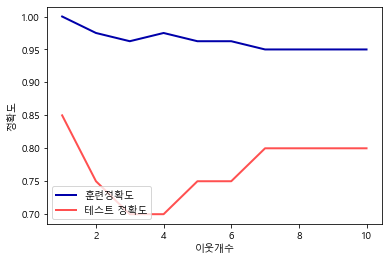

In [314]:
from sklearn.neighbors import KNeighborsClassifier

trainning_accuracy = []
test_accuracy = []

neighboring_settings = range(1, 11)

for neighboring in neighboring_settings:
    clf = KNeighborsClassifier(n_neighbors = neighboring)
    clf.fit(X_train, y_train)
    
    trainning_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighboring_settings, trainning_accuracy, label = '훈련정확도')
plt.plot(neighboring_settings, test_accuracy, label = '테스트 정확도')
plt.xlabel("이웃개수")
plt.ylabel("정확도")
plt.legend(loc = 3)
plt.show()

### 위의 갯수에 따른 학습 및 예측

In [345]:
clf = KNeighborsClassifier(n_neighbors = 1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [346]:
y_pred

array(['SG', 'C', 'C', 'SG', 'C', 'SG', 'SG', 'C', 'SG', 'SG', 'C', 'C',
       'SG', 'SG', 'C', 'C', 'SG', 'SG', 'C', 'SG', 'SG', 'C', 'SG', 'C',
       'C'], dtype=object)

In [347]:
from sklearn.metrics import accuracy_score
print("테스트 세스 정확도 : {0:.2f}".format(clf.score(X_test, y_test)))
print("예측값 정확도 : {0:.2f}".format(accuracy_score(y_test, y_pred)))

테스트 세스 정확도 : 0.88
예측값 정확도 : 0.88


### 예측값과 실제값 비교

In [349]:
pd.DataFrame({"예측값": y_pred, "실제값": y_test, "비교결과": y_pred == y_test})

,예측값,실제값,비교결과
8,SG,SG,True
93,C,C,True
4,C,SG,False
5,SG,SG,True
52,C,C,True
41,SG,SG,True
0,SG,SG,True
73,C,SG,False
88,SG,SG,True
68,SG,SG,True
